In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Monthly Patents data can be found on [data.uspto.gov](https://data.uspto.gov/bulkdata/datasets/histexc?fileDataFromDate=2015-06-25&fileDataToDate=2015-07-02). Only `monthly.csv` file is required.

In [ ]:
df = pd.read_csv('../data/patents/monthly.csv', index_col=False, parse_dates=['month'], date_format="%Ym%m")
df = df.dropna(axis=1)
df.columns = ['ds', *range(len(df.columns)-1)]
display(df)

,ds,0,1,2,3,4,5,6,7,8,...,182,183,184,185,186,187,188,189,190,191
0,1981-01-01,71,122,58,265,196,959,251,139,39,...,0,1123394,265788,72527,40082,187634,284572,272791,0,0
1,1981-02-01,75,161,52,325,231,961,236,175,58,...,0,1125887,266507,72751,40364,187981,284973,273311,0,0
2,1981-03-01,96,213,69,437,263,1225,286,189,82,...,0,1127577,267285,72904,40707,188266,285000,273415,0,0
3,1981-04-01,91,143,47,330,287,1133,252,213,59,...,0,1129034,267849,73016,41010,188485,285100,273574,0,0
4,1981-05-01,76,176,45,309,253,1099,227,231,65,...,0,1130698,268450,73201,41259,188671,285349,273768,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2014-08-01,58,239,71,358,390,1568,2914,3208,1129,...,219,2511215,263391,819998,251849,574978,322830,277934,16,219
404,2014-09-01,57,246,137,365,421,1839,3652,4179,1315,...,215,2529308,264487,828549,253631,579039,324177,279194,16,215
405,2014-10-01,95,250,88,380,442,1723,3177,3333,1158,...,214,2540921,264953,834683,254667,581515,324957,279916,16,214
406,2014-11-01,57,209,78,323,378,1494,2738,2924,1099,...,212,2552339,265478,840473,255835,584045,325534,280416,346,212


In [ ]:
new_df = None
id = 0
for col in df.columns[1:]:
    if min(df[col]) < 100:
        continue
    temp_df = df[['ds', col]]
    temp_df.insert(1,'unique_id',id)
    temp_df = temp_df.rename(columns={col:'y'})
    if id == 0:
        new_df = temp_df
    else:
        new_df = pd.concat((new_df, temp_df))
    id += 1
new_df.to_csv('../data/patents/y_patents.csv')
display(new_df)

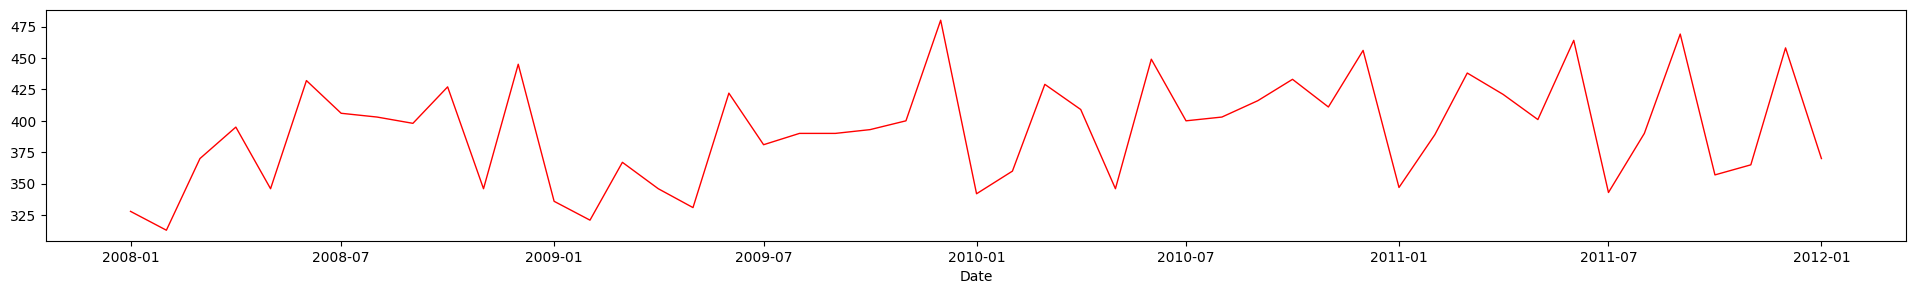

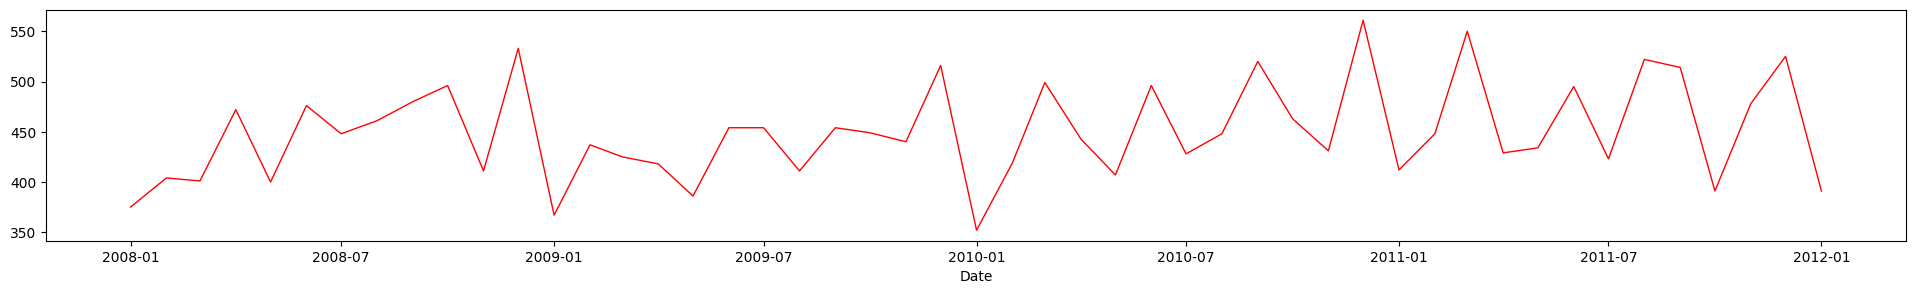

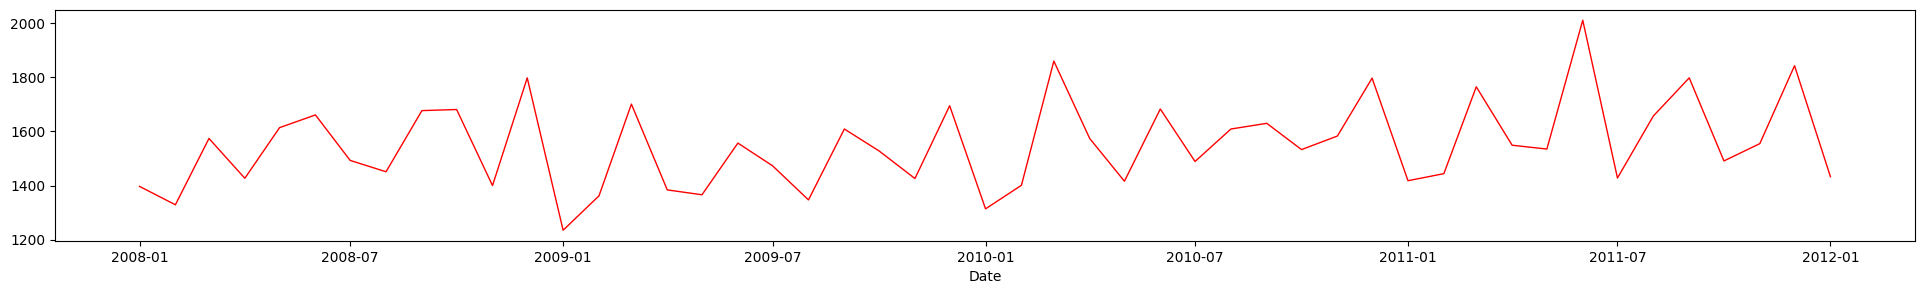

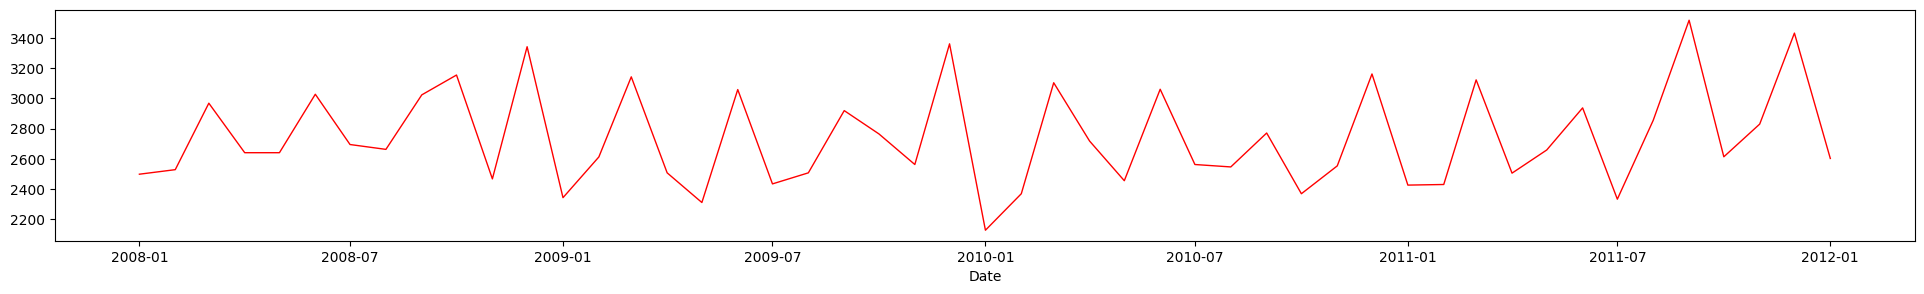

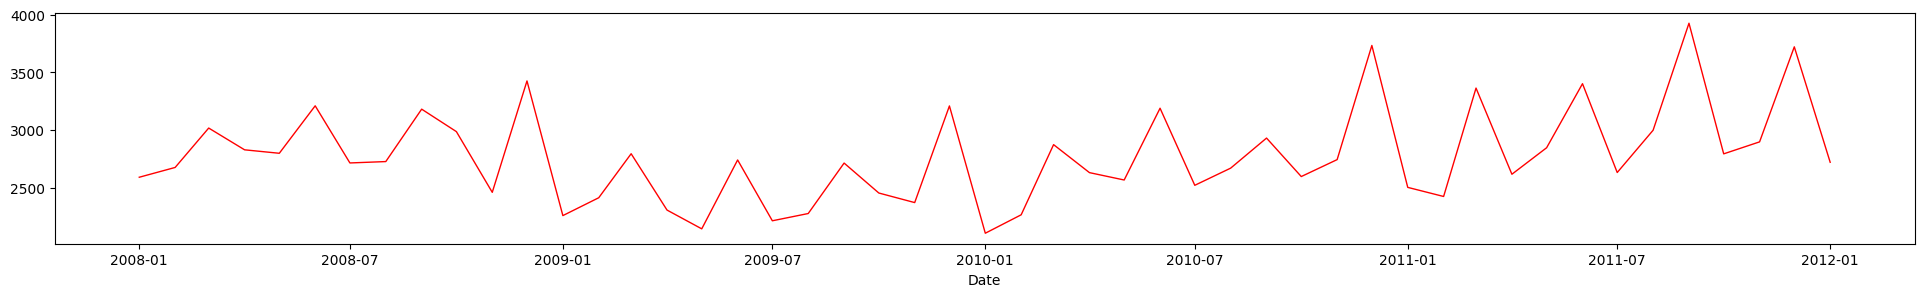

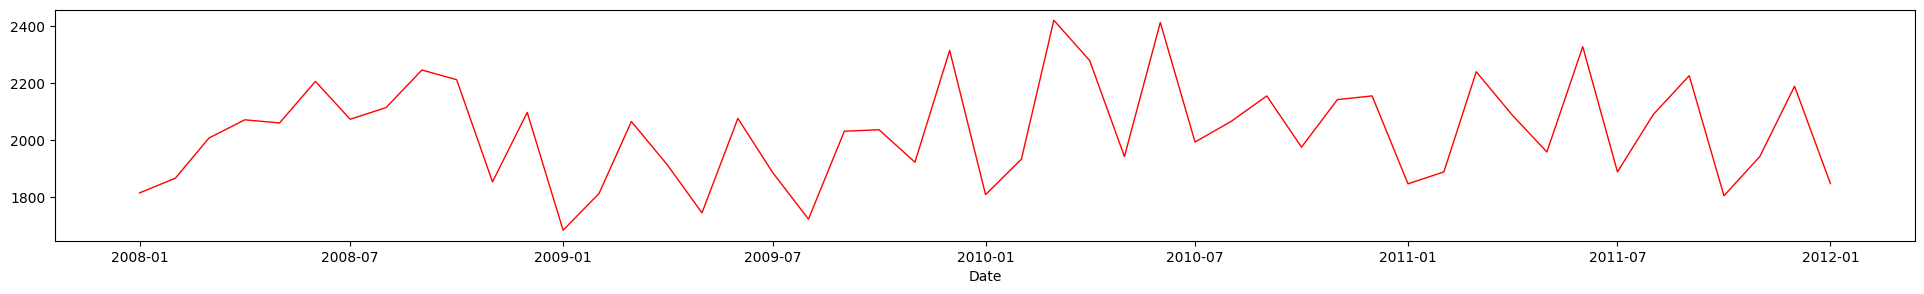

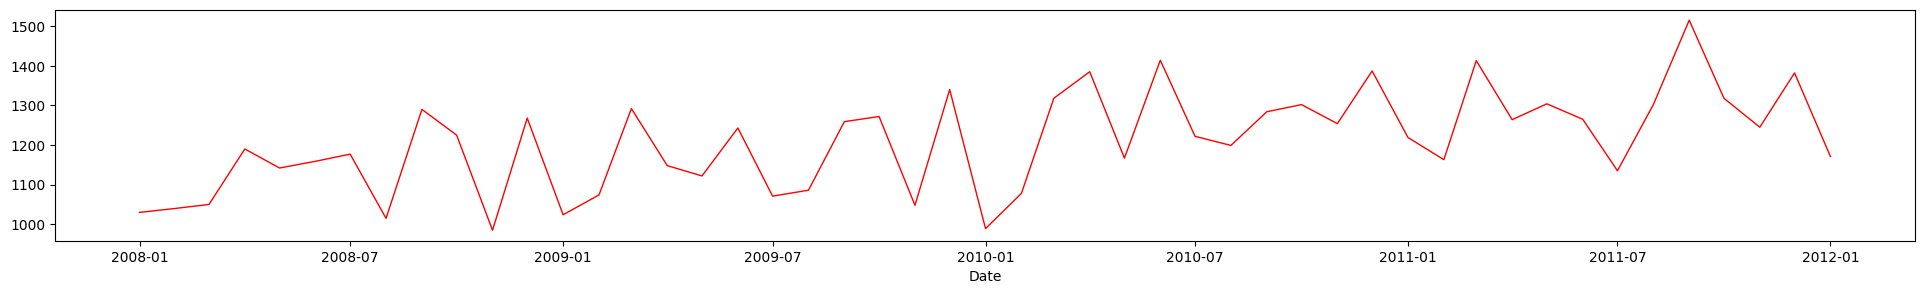

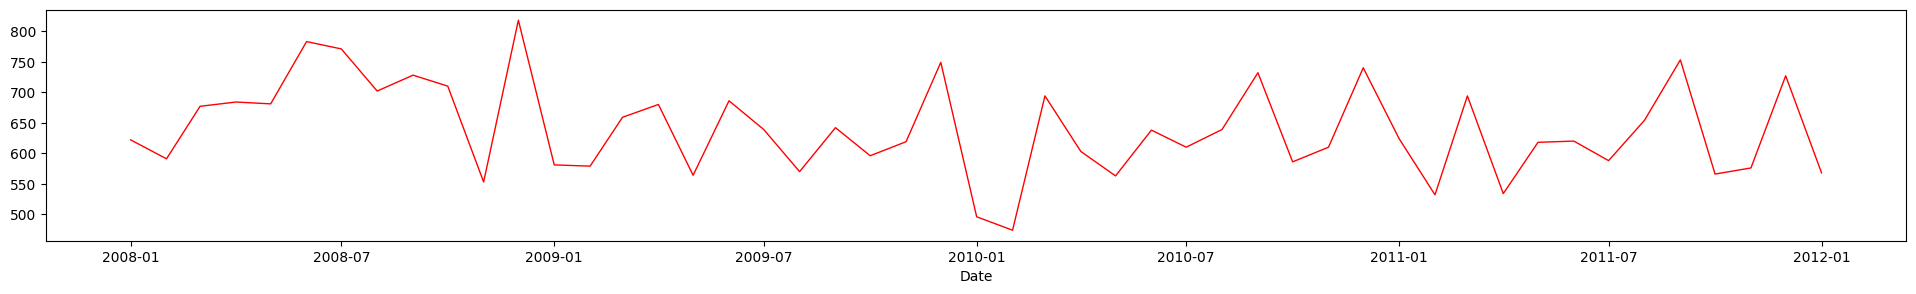

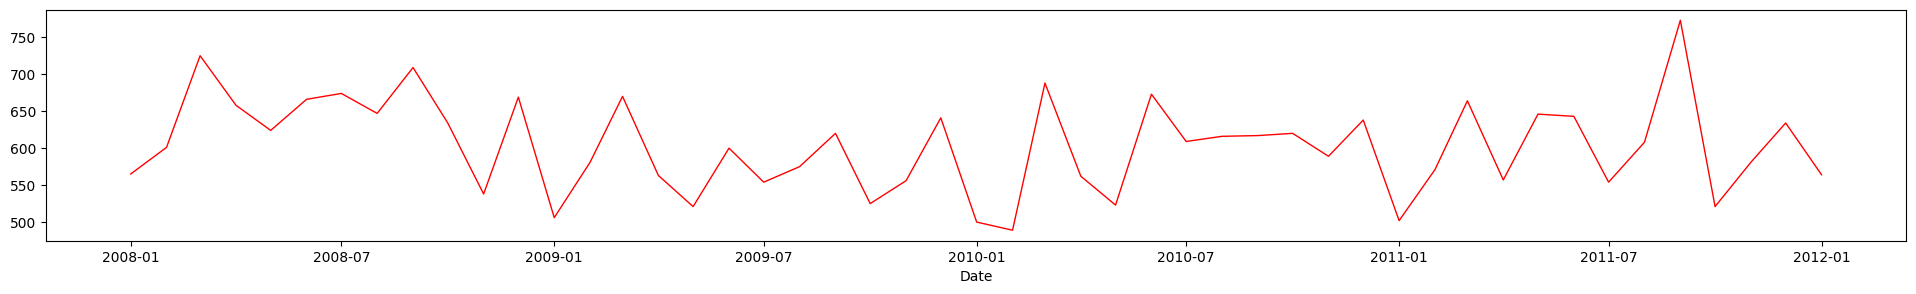

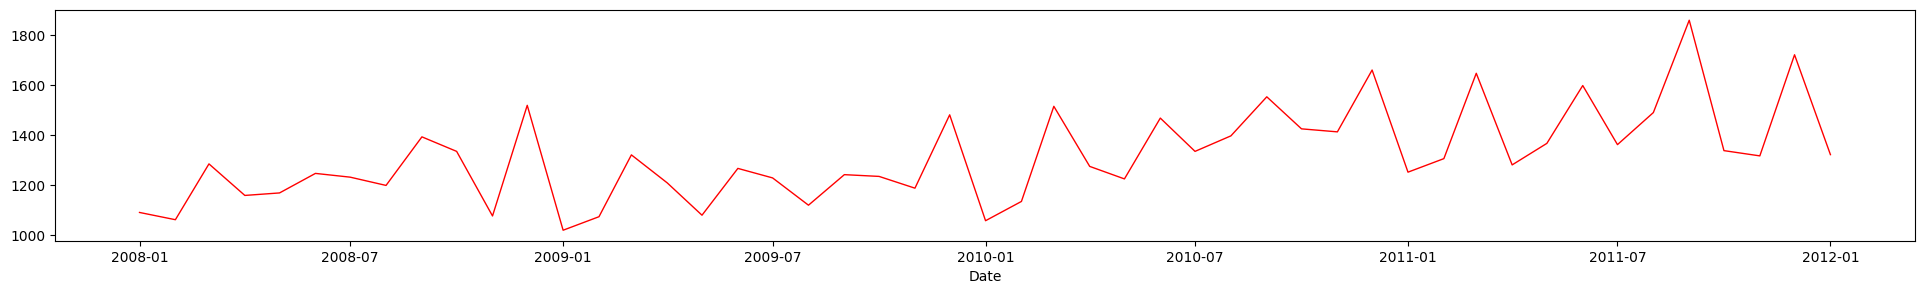

In [ ]:
def plot_df(df, id, timestamp, graph_before, steps_ahead, plt_tmp=plt, unit='D'):
    true_y = df.loc[(df["unique_id"]==id) & (df["ds"]>=timestamp-pd.Timedelta(31*graph_before, unit=unit)) & (df["ds"]<timestamp+pd.Timedelta(31*steps_ahead, unit=unit)), "y"].to_numpy().flatten()
    plt_tmp.plot(df.loc[(df["unique_id"]==id) & (df["ds"]>=timestamp-pd.Timedelta(31*graph_before, unit=unit)) & (df["ds"]<timestamp+pd.Timedelta(31*steps_ahead, unit=unit)), "ds"].to_numpy().flatten(), true_y, label=f"True", linewidth=1, color='r')

id = 0
for id in range(10):
    plt.figure(figsize=(24,3))
    timestamp = pd.Timestamp("2010-01-01")
    graph_before = 12*2
    steps_ahead = 24
    plot_df(new_df, id, timestamp, graph_before, steps_ahead)
    plt.xlabel("Date")
    plt.show()